# Approach:

-Data processing
-Descriptive analysis
-Logistic Regression, feature selections, parameter tuning, and result interpretation
-Suggestions & next steps

# Key Findings:

- EDA
• New clients are more likely to churn
• Senior citizens are more likely to churn
• Clients who do not have partner or dependent are more likely to churn
• Clients who have phone service and have multiple lines are more likely to churn
• Clients with fiber optic internet service are more likely to churn
• Clients with no internet service have relatively lower churn rate
• Clients who doesn't have other services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV, StreamingMovies) are more likely to churn
• Clients with short term contract type are more likely to churn
• Clients with paperless billing are more likely to churn
• Clients who have payment method with Electornic Check are more likely to churn

- Modeling
• Logistic regression to predict customer churn based on clients preference and demographic information, has 78% recall score
Clients with short-term contract type, electronic payment method, fiber optic internet service, no other service have higher probability to churn
• As for clients demographic information, clients who are senior citizens, and have no dependent are more likely to churn
Clients with 2 year contract type, no paperless billing, and multiple phone lines have the most negative relation with Churn
Suggestions & next steps
• Utilize the result produced by logistic regression, and target the right client demographics and preference in order to get fewer customer churn
• Look into factors negatively impact customer churn such as 2 year contract type, no paperless billing, and multiple phone lines 
• Include more data and factors that affect clients’ decision to improve model’s performance

## 1. Data Processing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/Users/vshao/OneDrive - Clinical Care Options/Desktop/Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.apply(lambda x: x == ' ', axis = 1).mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

- Column TotalCharges contains empty string, therefore, we are going to replace the empty string with "0"
- Convert TotalCharges to numerical data type

In [8]:
df.loc[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df['TotalCharges'] = df['MonthlyCharges'] * df['tenure']

In [10]:
df.loc[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. EDA

### 2.1 Target Variable - Churn

Text(0.5, 1.0, 'Churn')

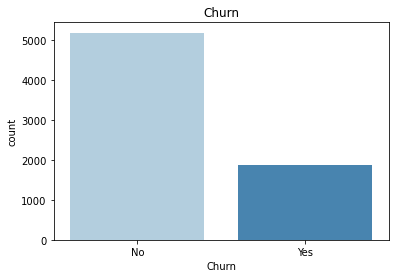

In [13]:
sns.countplot(x='Churn', data=df, palette='Blues').set_title('Churn')

- About 2000 clients cancelled our service, and about 5100 clients stay with our service.

### 2.2 Churn vs. Tenure

Text(0.5, 1.0, 'Churn vs. Tenure')

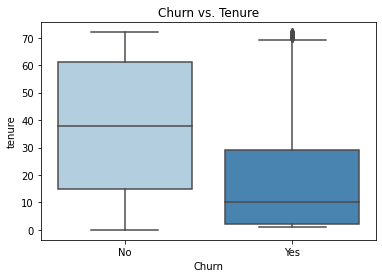

In [16]:
sns.boxplot(y='tenure', data=df, x='Churn', palette='Blues').set_title('Churn vs. Tenure')

- New clients are more likely to churn

### 2.3 Churn vs. Monthly Charges

Text(0.5, 1.0, 'Churn vs. Monthly Charges')

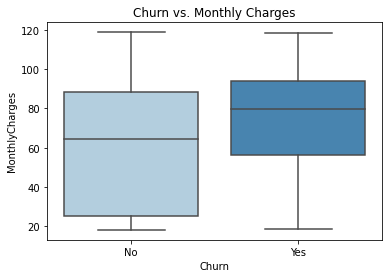

In [17]:
sns.boxplot(y='MonthlyCharges', data=df, x='Churn', palette='Blues').set_title('Churn vs. Monthly Charges')

- Clients with higher monthly charges are more likely to churn

### 2.4 Churn vs. Gender

In [18]:
df['Churn_dummy'] = df.Churn.replace('No', 0).replace('Yes', 1)

In [19]:
df['Churn_dummy'] = df['Churn'].map({'Yes':1, 'No':0})

Text(0.5, 1.0, 'Churn vs. Gender')

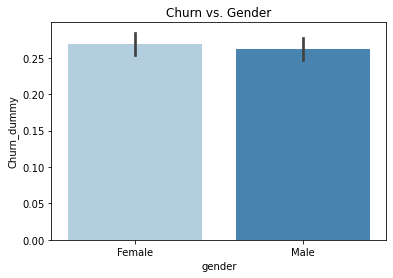

In [20]:
sns.barplot(y='Churn_dummy', data=df, x='gender',palette='Blues').set_title('Churn vs. Gender')

- Gender is not a determinant of churn

### 2.4 Churn vs. Seniority

Text(0.5, 1.0, 'Churn vs. Seniority')

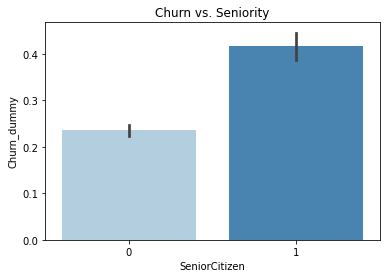

In [21]:
sns.barplot(y='Churn_dummy', data=df, x='SeniorCitizen',palette='Blues').set_title('Churn vs. Seniority')

- Senior citizens are more likely to churn

### 2.5 Churn vs. Partner and Churn vs. Dependents

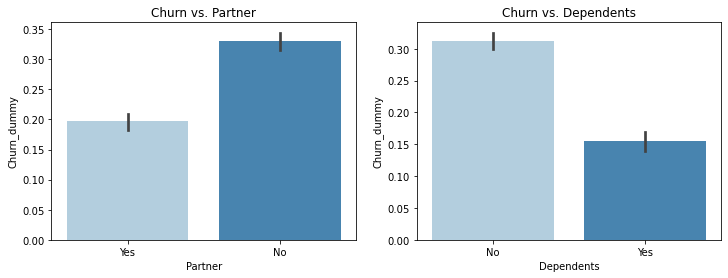

In [22]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. Partner')
axis[1].set_title('Churn vs. Dependents')
sns.barplot(y='Churn_dummy', data=df, x='Partner',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='Dependents',palette='Blues', ax=axis[1])

- Clients who do not have partner or dependent are more likely to churn

### 2.6 Churn vs. PhoneService and Churn vs. MultipleLines

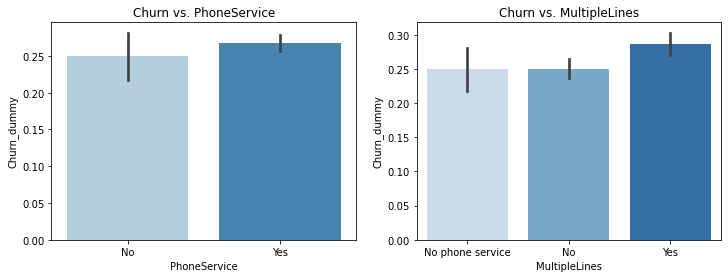

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. PhoneService')
axis[1].set_title('Churn vs. MultipleLines')
sns.barplot(y='Churn_dummy', data=df, x='PhoneService',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='MultipleLines',palette='Blues', ax=axis[1])

- Clients who have phone service and have multiple lines are more likely to churn

### 2.6 Churn vs. InternetService

Text(0.5, 1.0, 'Churn vs. InternetService')

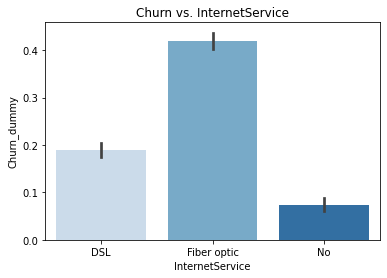

In [24]:
sns.barplot(y='Churn_dummy', data=df, x='InternetService',palette='Blues').set_title('Churn vs. InternetService')

- Clients with fiber optic internet service are more likely to churn
- Clients with no internet service have relatively lower churn rate

### 2.7 Churn vs. Other Services

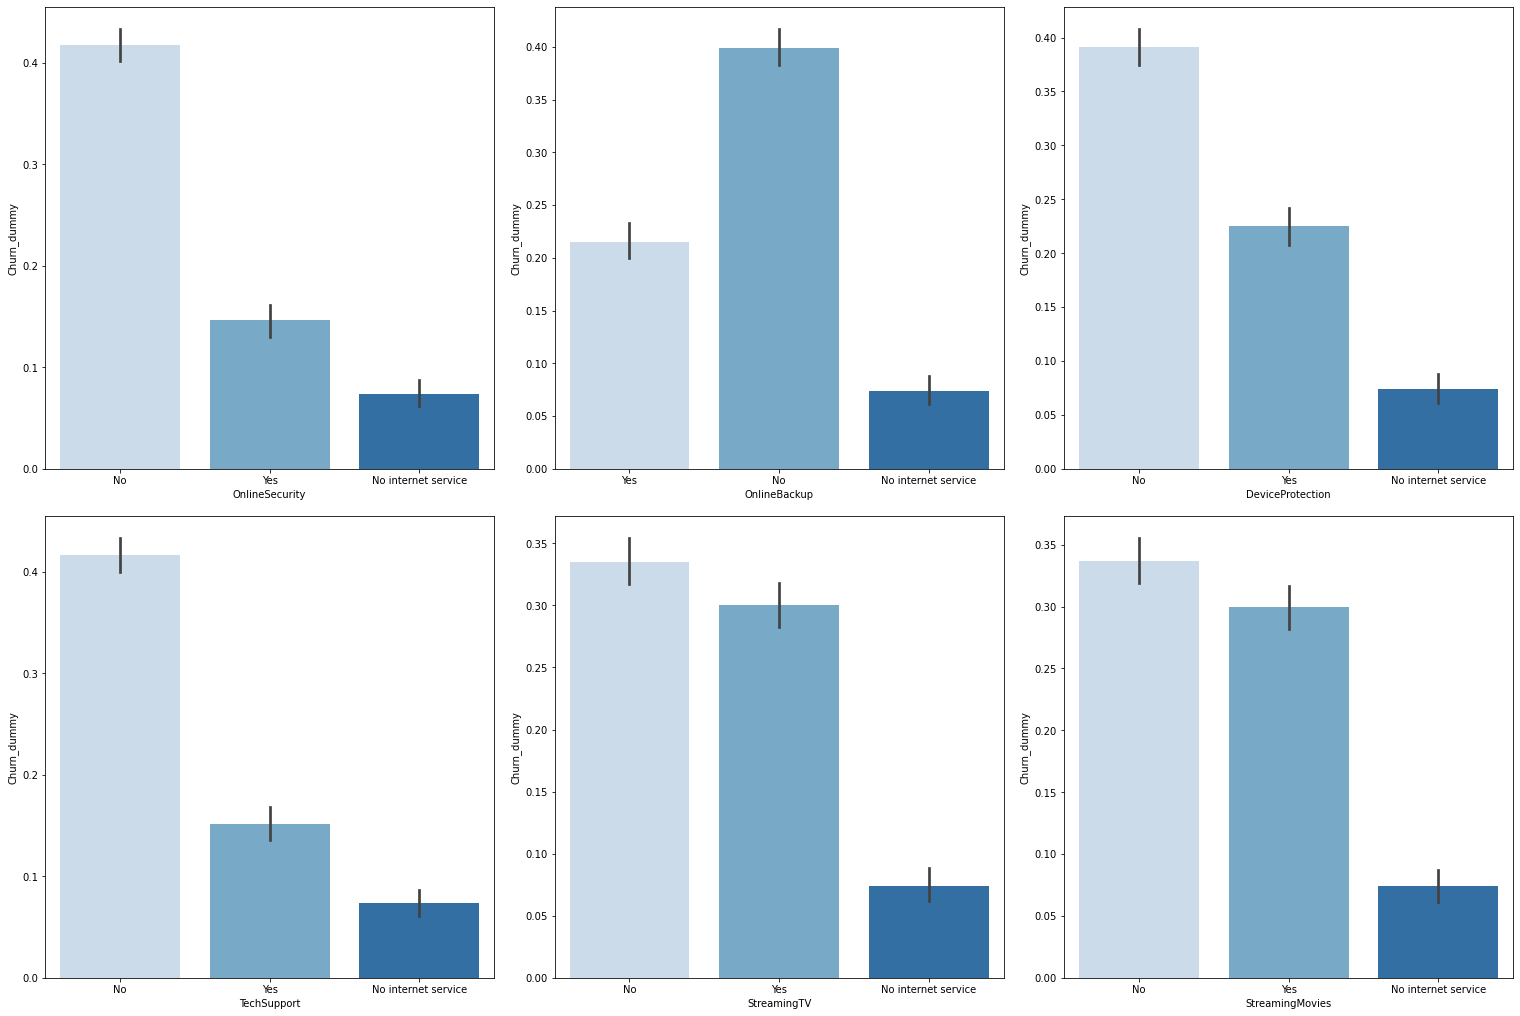

In [25]:
other_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
num_plots = len(other_services)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(other_services):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(y='Churn_dummy',x=var, data=df, ax=axs[row][pos], palette='Blues')

- Clients who doesn't have other services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV, StreamingMovies) are more likely to churn

### 2.8 Churn vs. Contract

Text(0.5, 1.0, 'Churn vs. Contract')

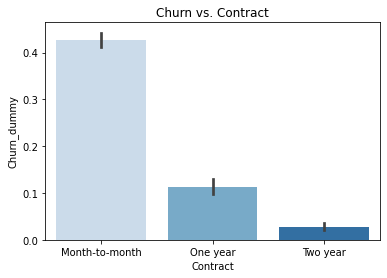

In [26]:
sns.barplot(y='Churn_dummy', data=df, x='Contract',palette='Blues').set_title('Churn vs. Contract')

- Clients with short term contract type are more likely to churn

### 2.9 Churn vs. PaperlessBilling and Churn vs. PaymentMethod

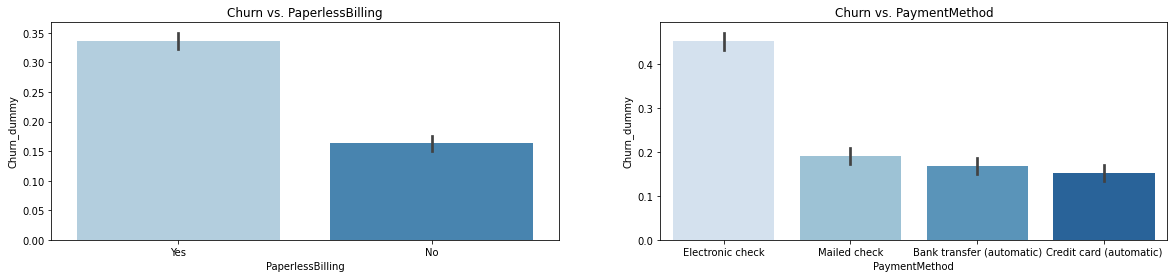

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(20,4))
axis[0].set_title('Churn vs. PaperlessBilling')
axis[1].set_title('Churn vs. PaymentMethod')
sns.barplot(y='Churn_dummy', data=df, x='PaperlessBilling',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='PaymentMethod',palette='Blues', ax=axis[1])

- Clients with paperless billing are more likely to churn
- Clients who have payment method with Electornic Check are more likely to churn

## 3. Data Modeling

### 3.1 Data Preparation

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_dummy
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1936.30,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes,1


In [31]:
data_raw = df.drop(columns = ['customerID', 'gender', 'Churn'], axis=1, inplace=False)

X = pd.get_dummies(data_raw.drop('Churn_dummy', axis=1, inplace=False), drop_first=True)
y = data_raw['Churn_dummy']

In [33]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1936.30,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,107.70,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1903.50,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,141.40,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,2035.20,1,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7430.40,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,325.60,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,297.60,1,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, stratify=y, train_size=0.8)

### 3.2 Logistic Regression

#### 3.2.1 Feature Selections

In [35]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(class_weight='balanced')

#### 3.2.2 GridSearch & Parameter Tuning

In [37]:
C = np.arange(0.1, 0.3, 0.01)
penalty = ['l1', 'l2']

param_grid = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(lgr, param_grid, scoring='recall', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_lgr = pd.DataFrame(grid_result.cv_results_)
result_lgr.sort_values(by='mean_test_score', ascending=False)[:4]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.093551,0.013652,0.005184,0.001164,0.2,l2,"{'C': 0.19999999999999996, 'penalty': 'l2'}",0.799331,0.765886,0.742475,0.829431,0.806020,0.788629,0.030755,1
3,0.132693,0.018747,0.005586,0.001018,0.11,l2,"{'C': 0.11, 'penalty': 'l2'}",0.806020,0.749164,0.755853,0.826087,0.802676,0.787960,0.030108,2
19,0.095546,0.002034,0.004589,0.001356,0.19,l2,"{'C': 0.18999999999999995, 'penalty': 'l2'}",0.779264,0.765886,0.755853,0.829431,0.802676,0.786622,0.026538,3
29,0.108907,0.009514,0.005387,0.001017,0.24,l2,"{'C': 0.23999999999999994, 'penalty': 'l2'}",0.799331,0.765886,0.735786,0.839465,0.792642,0.786622,0.034654,3


In [38]:
best_lgr = grid_search.best_estimator_
y_pred = best_lgr.predict(X_test)
print(recall_score(y_test, y_pred))

0.7620320855614974


- We are more interested in the clients who are churn, so recall score is an appropriate metric in cross validation and measuring generalization ability
- The best model has a recall score of 0.76 on testing dataset

#### 3.2.3 Model Result Interpretation

In [39]:
Coeffient = best_lgr.coef_.flatten()
pd.DataFrame({'Coeffient':Coeffient}, index=X.columns).sort_values(by='Coeffient', ascending=False)

,Coeffient
PaymentMethod_Electronic check,0.388729
PaperlessBilling_Yes,0.338113
SeniorCitizen,0.334721
MultipleLines_No phone service,0.311211
InternetService_Fiber optic,0.283066
MultipleLines_Yes,0.157636
StreamingTV_Yes,0.077792
StreamingMovies_Yes,0.068517
Partner_Yes,0.038773
MonthlyCharges,0.014555


## 4. Suggestions & Next Steps

- Utilize the result produced by logistic regression, and target the right client demographics and preference in order to get fewer customer churn
- Look into factors negatively impact customer churn such as 2 year contract type, no paperless billing, and multiple phone lines
- Include more data and factors that affect clients’ decision to improve model’s performance